#Preparações:#

Primeiramente, vamos importar as bibliotecas que iremos utilizar para essa análise.

In [0]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

Agora, vamos carregar nossa base de dados.

In [0]:
data = pd.read_csv('heart.csv')

Com os dados carregados, vamos dar uma breve olhada no dataset.

In [0]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [0]:
data.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


#Funções e atributos interessantes:#

Para ter uma primeira ideia da distribuição dos dados, podemos utilizar a função **describe()**, que é similar à função **summary** do R.

Essa função nos disponibiliza a quantidade de dados de cada coluna, assim como suas médias, medianas, desvio padrão, valores maximos e mínimos e os percentis 25% e 75%


In [0]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


Para verificar rapidamente os rótulos das colunas, podemos utilizar a lista de rótulos, chamando o campo **columns** do dataset.

In [0]:
data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

A função **sample()**, nos dá uma amostra aleatória do dataset, é bem interessante para ver em primeira mão o formato de seus dados ou tentar observar alguns valores discrepantes ou inválidos.

In [0]:
data.sample(frac=0.01) # O parâmetro "frac" diz a fração de dados que desejamos observar (nesse caso, 0,01%)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
149,42,1,2,130,180,0,1,150,0,0.0,2,0,2,1
195,59,1,0,170,326,0,0,140,1,3.4,0,0,3,0
159,56,1,1,130,221,0,0,163,0,0.0,2,0,3,1


In [0]:
# Também é possível utilizar o parâmatro n para obter uma visualização similar ao frac (no caso, n é a quantidade de linhas que você deseja ver)
data.sample(n=3)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
134,41,0,1,126,306,0,1,163,0,0.0,2,0,2,1
110,64,0,0,180,325,0,1,154,1,0.0,2,0,2,1
223,56,0,0,200,288,1,0,133,1,4.0,0,2,3,0


Também é possível renomear as colunas do dataset, utilizando a função **rename()**, da seguinte forma.

In [0]:
data=data.rename(columns={'age':'Age','sex':'Sex','cp':'Cp','trestbps':'Trestbps','chol':'Chol','fbs':'Fbs','restecg':
                          'Restecg','thalach':'Thalach','exang':'Exang','oldpeak':'Oldpeak','slope':'Slope','ca':'Ca','thal':'Thal','target':'Target'})

Outra forma de verificar se o dataset apresenta dados nulos é utilizando a função **isnull()**, ela irá retornar um dataset com a mesma quantidade de dados que o original, mas com todos os elementos sendo **True** ou **False**, para o caso daquele elemento na tabela principal ser nulo ou não.

Mas como temos várias colunas, podemos utilizar a função **sum()** para contar diretamente a quantidade de valores nulos dentro de cada coluna.

In [0]:
data.isnull().sum()

Age         0
Sex         0
Cp          0
Trestbps    0
Chol        0
Fbs         0
Restecg     0
Thalach     0
Exang       0
Oldpeak     0
Slope       0
Ca          0
Thal        0
Target      0
dtype: int64

Ainda há outra alternativa de verificar se há valores nulos, basta utilizar o **isnull()** juntamente com a função **any()** em cima do campo **values** do dataset booleano

In [0]:
data.isnull().values.any()

False

#Plotagem de gráficos e algumas análises sobre o dataset:#

Outra funcionalidade dos dataframes é nos permitir a plotagem de gráficos, afim de realizar mais análises em cima deles.

Vamos começar plotando um **heatmap** utilizando as bibliotecas **matplotlib** e **seaborn**.

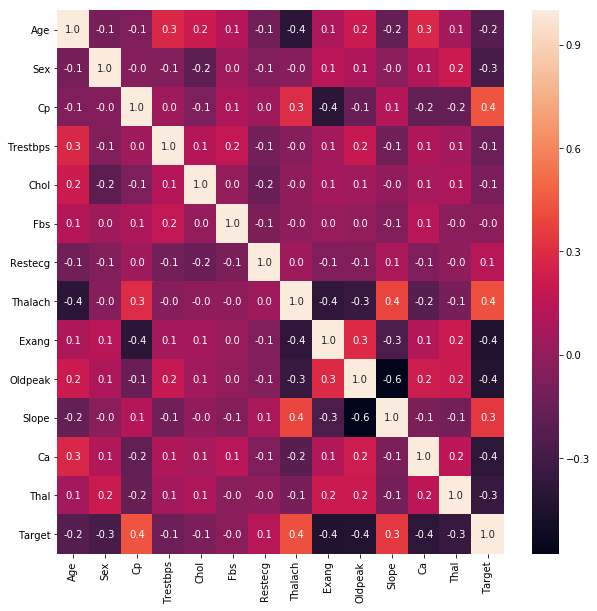

In [0]:
plt.figure(figsize=(10,10)) # Aqui utilizamos a biblioteca matplotlib para gerar uma figura que será utilizada para gerar nosso gráfico.
sns.heatmap(data.corr(),annot=True,fmt='.1f') 
# Acima chamamos a função que gerará o heatmap, os parâmetros utilizados são:
# 1: os dados que serão plotados (a função corr() do pandas que computa a correlação dos dados presentes no dataframe)
# 2: o campo annot é responsável por mostrar ou não os valores numéricos da correlação.
# 3: string responsável por denotar o formato de como os valores da correlação vão ser mostrados.
plt.show()

O heatmap é um gráfico bem complexo e repleto de informação por si, mas podemos modificar ainda mais a figura para melhorar a visualização dos dados e suas correlações, ou até mesmo para dar uma paleta de cores mais temática.

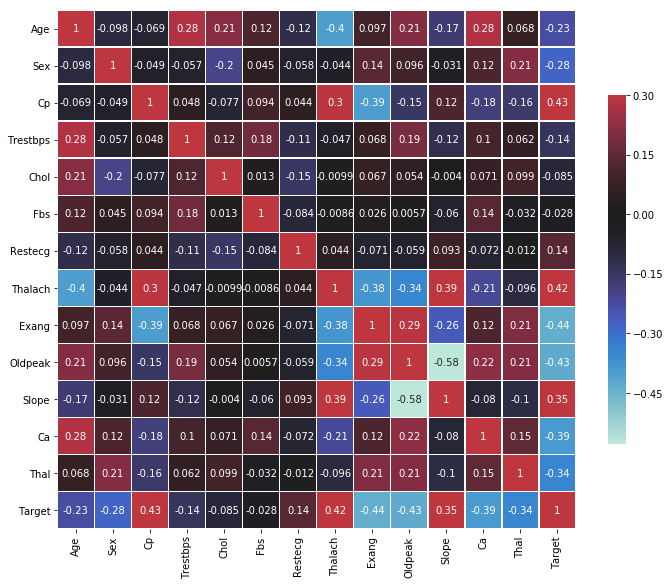

In [0]:
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(),vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5},annot=True)
plt.tight_layout()
plt.show()
# Para mais detalhes sobre os parâmetros que podemos utilizar no heatmap, basta acessar a documentação da biblioteca
# https://seaborn.pydata.org/generated/seaborn.heatmap.html#seaborn.heatmap para o heatmap ou
# https://seaborn.pydata.org/api.html para os gráficos em geral.

##Análise de idade:##

Vamos analizar a faixa etária das pessoas do nosso dataset, afim de separar "grupos notáveis" e facilitar análises futuras.

In [0]:
# Apenas uma amostra de algumas das idades que se repetem mais de 10 vezes no nosso dataset.
data.Age.value_counts()[:10]

58    19
57    17
54    16
59    14
52    13
51    12
62    11
44    11
60    11
56    11
Name: Age, dtype: int64

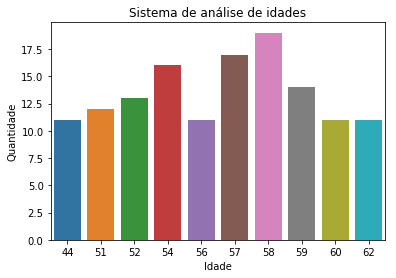

In [0]:
# Podemos plotar esse gráfico utilizando o campo "Age" do nosso dataset para verificarmos a distribuição das
# idades mais avançadas do nosso dataset
sns.barplot(x=data.Age.value_counts()[:10].index,y=data.Age.value_counts()[:10].values)
plt.xlabel('Idade')
plt.ylabel('Quantidade')
plt.title('Sistema de análise de idades')
plt.show()

Começando de verdade nossa análise, seria interessante verificar os dados que temos e em seguida agrupar as pessoas em faixar etárias.

In [0]:
# Primeiro, vamos olhar os valores da maior idade, menor idade e a idade média
minAge=min(data.Age)
maxAge=max(data.Age)
meanAge=data.Age.mean()
print('Menor idade: ',minAge)
print('Maior idade: ',maxAge)
print('Idade média: ',meanAge)

Menor idade:  29
Maior idade:  77
Idade média:  54.366336633663366


Abaixo, vamos observar quantos indivduos estarão agrupados nos grupos de **Jovens**, **Meia idade** e **Idosos**.

In [0]:
young_ages=data[(data.Age>=29)&(data.Age<40)]
middle_ages=data[(data.Age>=40)&(data.Age<55)]
elderly_ages=data[(data.Age>55)]
print('Jovens:',len(young_ages))
print('Meia idade:',len(middle_ages))
print('Idosos:',len(elderly_ages))

Jovens: 16
Meia idade: 128
Idosos: 151


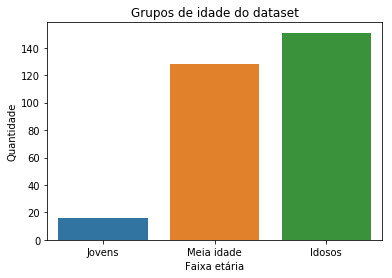

In [0]:
# Novamente, recomendamos olhar a documentação do seaborne para mais detalhes sobre os parãmetros de criação dos gráficos
# https://seaborn.pydata.org/generated/seaborn.barplot.html?highlight=barplot#seaborn.barplot Documentação do barplot
# https://seaborn.pydata.org/api.html
sns.barplot(x=['Jovens','Meia idade','Idosos'],y=[len(young_ages),len(middle_ages),len(elderly_ages)])
plt.xlabel('Faixa etária')
plt.ylabel('Quantidade')
plt.title('Grupos de idade do dataset')
plt.show()

Agora, vamos criar uma nova coluna para servir de rótulo para nossas categorias.

In [0]:
data['AgeRange']=0 # Aqui, criamos uma nova coluna para o dataset
# Abaixo, guardamos os índices das pessoas que se encaixam nos grupos etários que iremos criar.
youngAge_index=data[(data.Age>=29)&(data.Age<40)].index
middleAge_index=data[(data.Age>=40)&(data.Age<55)].index
elderlyAge_index=data[(data.Age>55)].index

Um outro jeito de rotular as nossas categorias é utilizar a função **cut()**, que nos retorna fatias do dataset especificadas pelo parâmatro bins.

Não estamos utilizando esse método agora pois utilizar valores numéricos facilitam nossa busca pelo dataset, mas caso sua intenção seja criar novos rótulos para deixar seu dataset mais intuitivo, a função **cut()** é uma ótima opção.

In [0]:
data['idade_classificacao'] = pd.cut(data.Age,bins=[29, 40, 55, 200],labels=['Jovens', 'Meia Idade', 'Idosos'])

In [0]:
# Agora, preenchemos a nova coluna com os nossos rótulos.
# 2 para idosos, 1 para meia idade e 0 para jovens.
for index in elderlyAge_index:
    data.loc[index,'AgeRange']=2
    
for index in middleAge_index:
    data.loc[index,'AgeRange']=1

for index in youngAge_index:
    data.loc[index,'AgeRange']=0

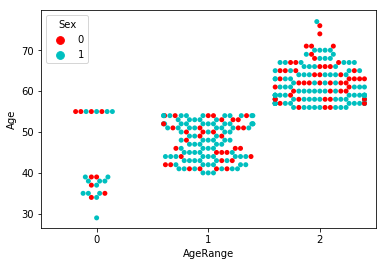

In [0]:
# Podemos gerar um gráfico de disperção categórico para observar o agrupamento dos dados.
sns.swarmplot(x="AgeRange", y="Age",hue='Sex',
              palette=["r", "c", "y"], data=data)
plt.show()

Outra forma de vizualizar a densidade dos grupos é utilizar o **violinplot**.

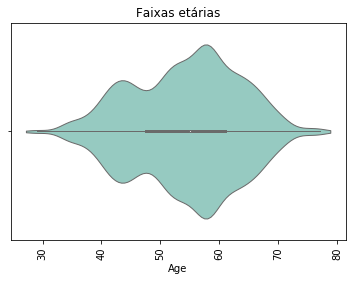

In [0]:
sns.violinplot(data.Age, palette="Set3", bw=.2, cut=1, linewidth=1)
plt.xticks(rotation=90)
plt.title("Faixas etárias")
plt.show()
# Quanto maior a área da figura, maior a concentração de pessoas naquela faixa etária.

Também podemos ver a "fatia" que cada grupo representa do nosso total de dados utilizando o **pieplot**.

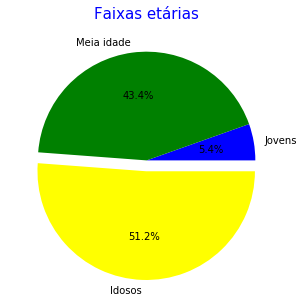

In [0]:
# Para mais detalhes sobre o pieplot, consultar a documentação do matplotlib
# Informações sobre o pieplot:
# https://matplotlib.org/api/_as_gen/matplotlib.pyplot.pie.html?highlight=pie#matplotlib.pyplot.pie
# Informação sobre as cores:
# https://matplotlib.org/3.1.0/gallery/color/named_colors.html pa
colors = ['blue','green','yellow']
explode = [0,0,0.1]
plt.figure(figsize = (5,5))
plt.pie([len(young_ages),len(middle_ages),len(elderly_ages)],labels=['Jovens','Meia idade','Idosos'],explode=explode,colors=colors, autopct='%1.1f%%')
plt.title('Faixas etárias',color = 'blue',fontsize = 15)
plt.show()

A partir dessa divisão, podemos analizar características específicas de um determidado grupo, por exemplo, verificar a quantidade de homens e mulheres dentre o grupo dos idosos.

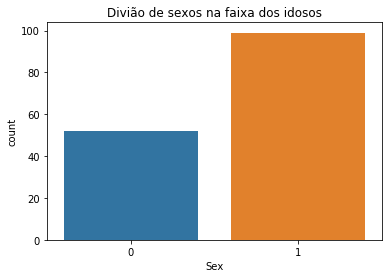

In [0]:
sns.countplot(elderly_ages.Sex)
plt.title("Divião de sexos na faixa dos idosos")
plt.show()
# Lembrando, 0 = feminino e 1 = masculino

Mas ainda podemos ir além e analizar a concentração de pacientes que possuem doenças cardíacas ou não em cada faixa de idade.

No handles with labels found to put in legend.


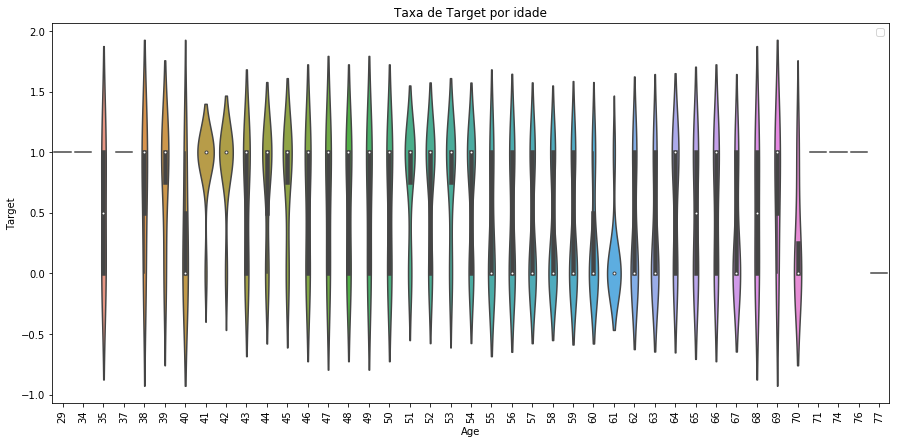

In [0]:
plt.figure(figsize=(15,7))
sns.violinplot(x=data.Age,y=data.Target)
plt.xticks(rotation=90)
plt.legend()
plt.title("Taxa de Target por idade")
plt.show()
# Lembrando, target 1 = possui doença e 0 = não possui.

Com esses dados em mãos, podemos realizar uma ultima análise, vamos visualizar a quantidade de homens que possuem doenças cardíacas em cada uma das faixas etárias que dividimos nos passos anteriores.

In [0]:
# Abaixo, vamos armazenar as linhas do nosso dataset que possuem os três critérios
# 1: São homens;
# 2: Estão dentro de um grupo etário específico;
# 3: Possuem doenças cardíacas (target = 1)
male_young_t_1=data[(data['Sex']==1)&(data['AgeRange']==0)&(data['Target']==1)]
male_middle_t_1=data[(data['Sex']==1)&(data['AgeRange']==1)&(data['Target']==1)]
male_elderly_t_1=data[(data['Sex']==1)&(data['AgeRange']==2)&(data['Target']==1)]
print(len(male_young_t_1))
print(len(male_middle_t_1))
print(len(male_elderly_t_1))

8
55
30


Com esses dados em mãos, podemos gerar um gráfico para observarmos a pressão cardíaca das pessoas doentes dentro de cada faixa etária.

No handles with labels found to put in legend.


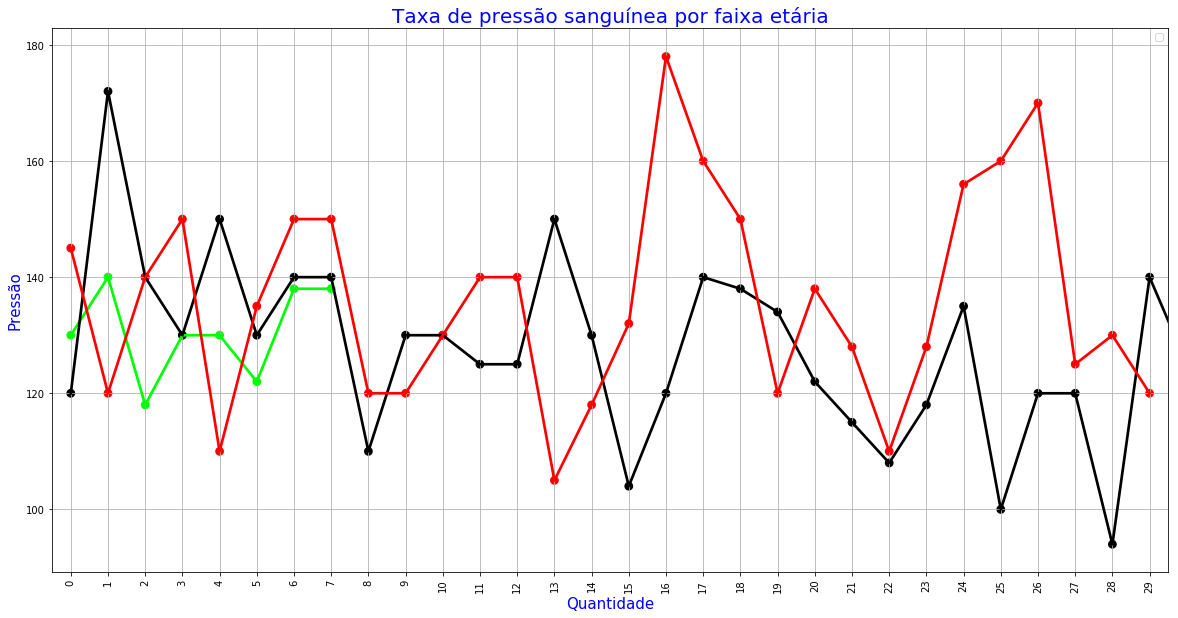

In [0]:
f,ax1=plt.subplots(figsize=(20,10))
sns.pointplot(x=np.arange(len(male_young_t_1)),y=male_young_t_1.Trestbps,color='lime',alpha=0.8,label='Jovem')
sns.pointplot(x=np.arange(len(male_middle_t_1)),y=male_middle_t_1.Trestbps,color='black',alpha=0.8,label='Meia idade')
sns.pointplot(x=np.arange(len(male_elderly_t_1)),y=male_elderly_t_1.Trestbps,color='red',alpha=0.8,label='Idoso')
plt.xlabel('Quantidade',fontsize = 15,color='blue')
plt.xticks(rotation=90)
plt.legend(loc='upper right',frameon=True)
plt.ylabel('Pressão',fontsize = 15,color='blue')
plt.title('Taxa de pressão sanguínea por faixa etária',fontsize = 20,color='blue')
plt.grid()
plt.show()

O que podemos tirar de informações desse gráfico? Ele é intuitivo o suficiente?

Para ver a análise completa basta acessar o [kaggle](https://www.kaggle.com/kralmachine/analyzing-the-heart-disease/notebook), nele você pode encontrar uma descrição mais detalhada desses dados e uma aplicação de machine learning para analisá-los..